In [1]:
import os
import numpy as np
import pymatbridge as pymat

/Users/arokem/anaconda3/lib/python3.4/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
matlab = pymat.Matlab()
matlab.start()

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.MATLAB started and connected!


True

In [3]:
res = matlab.run_func('%s/matlab/www/demo_func.m'%os.path.dirname(pymat.__file__), {'a': 10})
res['result']

11

In [4]:
res_dict = matlab.run_code('a=[1,3,7]')
res_dict = matlab.run_code('plot(a)')
res_dict = matlab.run_code('b=a+1')
matlab.get_variable('b')

array([[ 2.,  4.,  8.]])


b =

     2     4     8



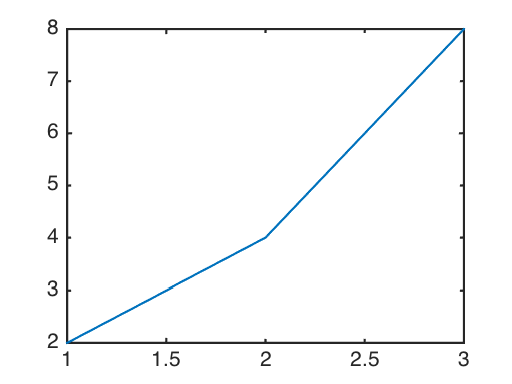

In [18]:
res_dict = matlab.run_code('figure; plot(b); b')

from IPython.core.displaypub import publish_display_data
imgfiles = [res_dict['content']['figures']]
text_output = res_dict['content']['stdout']

display_data = []
if text_output:
    display_data.append({'text/plain':text_output})
for imgf in imgfiles:
    try: # python 2
        image = open(imgf[0], 'rb').read().decode('utf-8') 
    except: # python 3
        image = open(imgf[0], 'rb').read()
        
    display_data.append({'image/png': image})

for d in display_data:
        publish_display_data(d)



In [19]:
matlab.is_connected()

.

True

In [20]:
matlab.stop()

MATLAB closed


True

In [21]:
matlab.is_connected()

False